In [ ]:
import requests
url = "https://storm.cis.fordham.edu/~yli/data/electronics/negative.review"
response=requests.get(url)
negative_text=response.text
#print(len(negative_text))

url = "https://storm.cis.fordham.edu/~yli/data/electronics/positive.review"
response=requests.get(url)
positive_text=response.text
#print(positive_text)

url = "https://storm.cis.fordham.edu/~yli/data/electronics/unlabeled.review"
response=requests.get(url)
unlabeled_text=response.text
#print(unlabeled_text)
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')
from sklearn import metrics
import string
from nltk.stem import WordNetLemmatizer

import re
punctuation = '!,;:?"\、，；）.( '
def removePunctuation(text):
    text = re.sub(r'[{}]+'.format(punctuation),' ',text)
    return text.strip()

def function(A):
    a=''
    soup=BeautifulSoup(A,'html.parser')
    for data in soup.find_all("review_text"): 
       b=''.join(data.findAll(text=True))
       a=a+b 
    return a




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.corpus import stopwords\


In [ ]:
  import nltk
  nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
e_stop=stopwords.words('english')
#e_stop


In [ ]:
positive_text1=function(positive_text)

positive_text2=removePunctuation(positive_text1)

tokenized_positive_words=nltk.word_tokenize(positive_text2)

negative_text1=function(negative_text)
negative_text2=removePunctuation(negative_text1)

tokenized_negative_words=nltk.word_tokenize(negative_text2)


# ***task one ***

positive remove words from stop word list

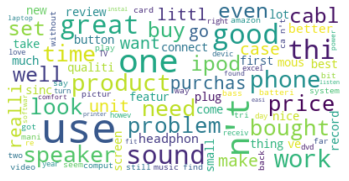

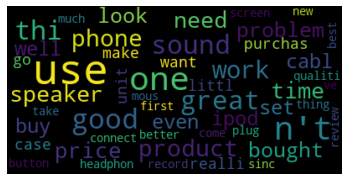

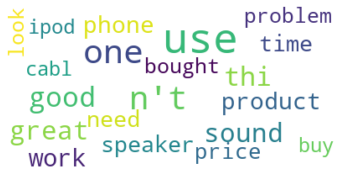

In [ ]:
filtered_tokens = [w for w in tokenized_positive_words if not w in e_stop] 
from nltk.stem.porter import *
stemmer = PorterStemmer()
steaming_filtered_tokens=[stemmer.stem(filtered_token) for filtered_token in filtered_tokens]
#print(steaming_filtered_tokens)
s1=" "
steaming_filtered_tokens = s1.join(steaming_filtered_tokens)
#print(steaming_filtered_tokens)

wordcloud100 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(steaming_filtered_tokens)
plt.imshow(wordcloud100, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud50 = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(steaming_filtered_tokens)
plt.imshow(wordcloud50, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud20 = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(steaming_filtered_tokens)
plt.imshow(wordcloud20, interpolation='bilinear')
plt.axis("off")
plt.show()


negative remove words from stop word list

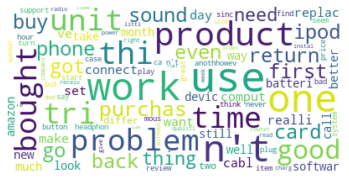

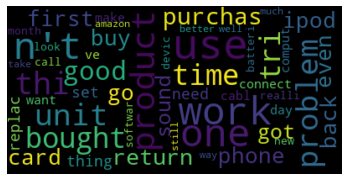

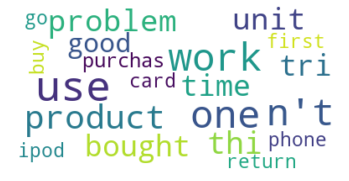

In [ ]:

filtered_tokens = [w for w in tokenized_negative_words if not w in e_stop] 
from nltk.stem.porter import *
stemmer = PorterStemmer()
steaming_filtered_tokens=[stemmer.stem(filtered_token) for filtered_token in filtered_tokens]
#print(steaming_filtered_tokens)
s1=" "
steaming_filtered_tokens = s1.join(steaming_filtered_tokens)
#print(steaming_filtered_tokens)

wordcloud100 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(steaming_filtered_tokens)
plt.imshow(wordcloud100, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud50 = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(steaming_filtered_tokens)
plt.imshow(wordcloud50, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud20 = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(steaming_filtered_tokens)
plt.imshow(wordcloud20, interpolation='bilinear')
plt.axis("off")
plt.show()


positive keep words from stop word list

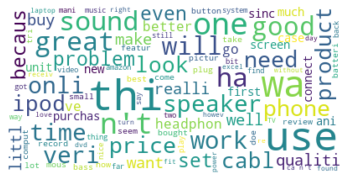

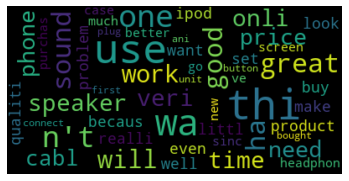

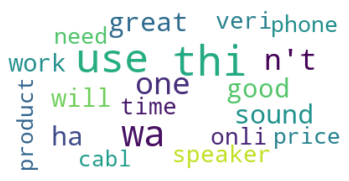

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
steaming_filtered_tokens=[stemmer.stem(tokenized_positive_word) for tokenized_positive_word in tokenized_positive_words]
#print(steaming_filtered_tokens)
s1=" "
steaming_filtered_tokens = s1.join(steaming_filtered_tokens)


wordcloud100 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(steaming_filtered_tokens)
plt.imshow(wordcloud100, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud50 = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(steaming_filtered_tokens)
plt.imshow(wordcloud50, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud20 = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(steaming_filtered_tokens)
plt.imshow(wordcloud20, interpolation='bilinear')
plt.axis("off")
plt.show()

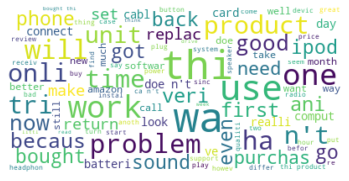

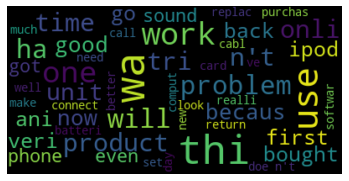

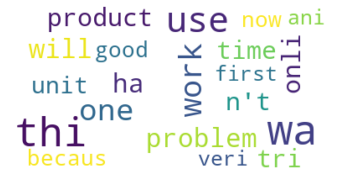

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
steaming_filtered_tokens=[stemmer.stem(tokenized_negative_word) for tokenized_negative_word in tokenized_negative_words]
#print(steaming_filtered_tokens)
s1=" "
steaming_filtered_tokens = s1.join(steaming_filtered_tokens)


wordcloud100 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(steaming_filtered_tokens)
plt.imshow(wordcloud100, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud50 = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(steaming_filtered_tokens)
plt.imshow(wordcloud50, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud20 = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(steaming_filtered_tokens)
plt.imshow(wordcloud20, interpolation='bilinear')
plt.axis("off")
plt.show()

For each shared word between two classes in two scenarios (remove/keep)stopwords compare  their frequencies. We can find that we should remove the stop words. Otherwise, those stop words with the highest frequency will cause disturbance.

# ***task 2&3***

              precision    recall  f1-score   support

    Positive       0.81      0.83      0.82       201
    Negative       0.82      0.80      0.81       199

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



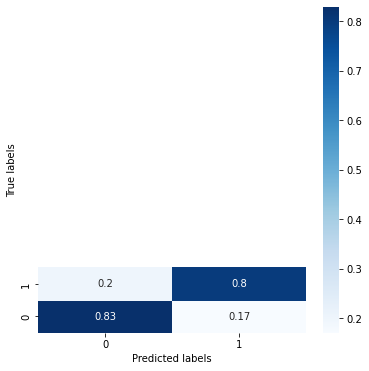

In [ ]:

from nltk.stem.porter import *
def mix_function(l):
    list=[w for w in l if not w in e_stop] 
    stemmer = PorterStemmer()
    steaming_list=[stemmer.stem(a) for a in list]
    return steaming_list

positive=[]
negative=[]
soup = BeautifulSoup(negative_text, 'html.parser')
for data in soup.find_all("review_text"): 
  a=''.join(data.findAll(text=True))
  a=' '.join(mix_function(a.split()))
  negative.append(a)
soup = BeautifulSoup(positive_text, 'html.parser')
for data in soup.find_all("review_text"): 
  b=''.join(data.findAll(text=True))
  b=' '.join(mix_function(b.split()))
  positive.append(b)


L0=[]
for i in range(1000):
  L0.append(0)
L1=[]
for i in range(1000):
  L1.append(1)
  
#if meet trouble for this line of code
#del(list)
list1=list(zip(positive,L1))
#del(list)
list2=list(zip(negative,L0))
df2=pd.DataFrame(list1,columns =['Name','value'])
df1=pd.DataFrame(list2,columns =['Name', 'value'])

dataframe= pd.concat([df1,df2])

#word counts with tf-idf transformation for NaiveBayes Classifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataframe["Name"],dataframe["value"],test_size =0.2)
tf_idf = TfidfVectorizer()
x_train_tf = tf_idf.fit_transform(x_train)
x_train_tf = tf_idf.transform(x_train)
x_test_tf = tf_idf.transform(x_test)
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(x_train_tf, y_train)
y_pred = naive_bayes_classifier.predict(x_test_tf)
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))
con_mat=metrics.confusion_matrix(y_test, y_pred)
import seaborn as sns
con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]    
con_mat_norm = np.around(con_mat_norm, decimals=2)
figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')
plt.ylim(0, 10)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


              precision    recall  f1-score   support

    Positive       0.79      0.82      0.81       200
    Negative       0.82      0.79      0.80       200

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.81      0.80       400



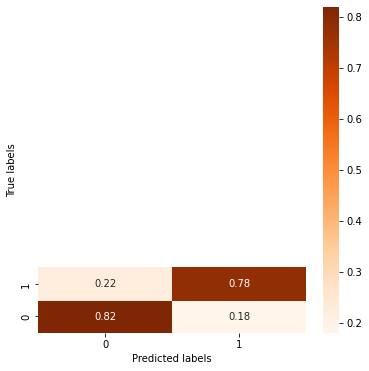

In [ ]:
#word counts with tf-idf transformation for Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(multi_class = 'multinomial', solver='lbfgs')
logistic_model.fit(x_train_tf, y_train)
logistic_model.score(x_test_tf, y_test)
y_pred = logistic_model.predict(x_test_tf)
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))
con_mat=metrics.confusion_matrix(y_test, y_pred)
import seaborn as sns
con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]    
con_mat_norm = np.around(con_mat_norm, decimals=2)
figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_norm, annot=True, cmap='Oranges')
plt.ylim(0, 10)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

              precision    recall  f1-score   support

    Positive       0.82      0.82      0.82       206
    Negative       0.81      0.81      0.81       194

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



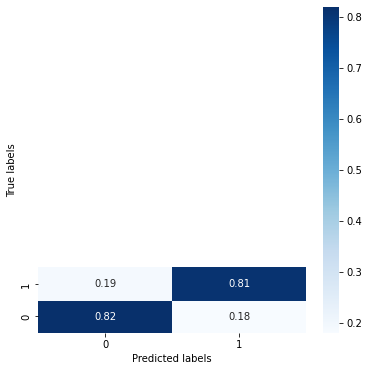

In [ ]:
#word occurrence for NaiveBayes Classifier
x=dataframe["Name"]
y=dataframe["value"]
cv = CountVectorizer(binary=True)
x_occurence=cv.fit_transform(x)
x_train_occurence, x_test_occurence, y_train, y_test = train_test_split(x_occurence,y,test_size =0.2)
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(x_train_occurence, y_train)
y_pred = naive_bayes_classifier.predict(x_test_occurence)
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))
con_mat=metrics.confusion_matrix(y_test, y_pred)
import seaborn as sns
con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]    
con_mat_norm = np.around(con_mat_norm, decimals=2)
figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')
plt.ylim(0, 10)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


              precision    recall  f1-score   support

    Positive       0.81      0.81      0.81       206
    Negative       0.80      0.80      0.80       194

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



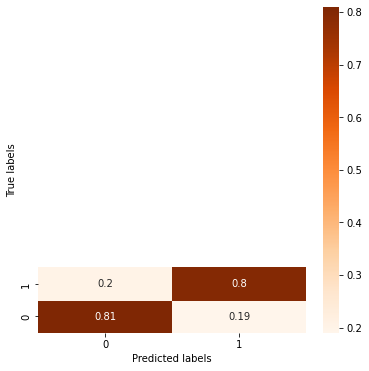

In [ ]:
#word occurrence for LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(multi_class = 'multinomial', solver='lbfgs')
logistic_model.fit(x_train_occurence, y_train)
logistic_model.score(x_test_occurence, y_test)
y_pred = logistic_model.predict(x_test_occurence)
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))
con_mat=metrics.confusion_matrix(y_test, y_pred)
import seaborn as sns
con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]    
con_mat_norm = np.around(con_mat_norm, decimals=2)
figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_norm, annot=True, cmap='Oranges')
plt.ylim(0, 10)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
print(x_train_occurence)

  (0, 162)	1
  (0, 239)	1
  (0, 818)	1
  (0, 894)	1
  (0, 916)	1
  (0, 1172)	1
  (0, 1257)	1
  (0, 1612)	1
  (0, 1647)	1
  (0, 1653)	1
  (0, 1752)	1
  (0, 1895)	1
  (0, 2091)	1
  (0, 2357)	1
  (0, 2621)	1
  (0, 2852)	1
  (0, 3438)	1
  (0, 3514)	1
  (0, 4130)	1
  (0, 4692)	1
  (0, 4761)	1
  (0, 5281)	1
  (0, 5362)	1
  (0, 5618)	1
  (0, 5640)	1
  :	:
  (1599, 5712)	1
  (1599, 5778)	1
  (1599, 6292)	1
  (1599, 6480)	1
  (1599, 6699)	1
  (1599, 6758)	1
  (1599, 7515)	1
  (1599, 7609)	1
  (1599, 7712)	1
  (1599, 7848)	1
  (1599, 8030)	1
  (1599, 8088)	1
  (1599, 8112)	1
  (1599, 8174)	1
  (1599, 8178)	1
  (1599, 8464)	1
  (1599, 8865)	1
  (1599, 9129)	1
  (1599, 9135)	1
  (1599, 9147)	1
  (1599, 9177)	1
  (1599, 9236)	1
  (1599, 9504)	1
  (1599, 10100)	1
  (1599, 10252)	1


In [ ]:
print(x_train_tf)

  (0, 9076)	0.13683199693978126
  (0, 8227)	0.06738782890926591
  (0, 7960)	0.17334473615100193
  (0, 7335)	0.14440945309808007
  (0, 6870)	0.12709911901373827
  (0, 6629)	0.25423189900087045
  (0, 6557)	0.10612730638166448
  (0, 6271)	0.15342075936430222
  (0, 6123)	0.3680829521252922
  (0, 5964)	0.17750468883202236
  (0, 5837)	0.1431029676570714
  (0, 5325)	0.16027792162612306
  (0, 5077)	0.12444393001152006
  (0, 4865)	0.15576737565619905
  (0, 4649)	0.13117569643968646
  (0, 4410)	0.15121645218872745
  (0, 3672)	0.2646919998244234
  (0, 3502)	0.18759936011927422
  (0, 2556)	0.16167655301228037
  (0, 2357)	0.25423189900087045
  (0, 1673)	0.2794346839100125
  (0, 1614)	0.19757786538820923
  (0, 1452)	0.20868152164577347
  (0, 1323)	0.09456241857606622
  (0, 1115)	0.12548285591359845
  :	:
  (1598, 326)	0.08690623544180225
  (1599, 9263)	0.08669988090069121
  (1599, 7638)	0.14400781931020107
  (1599, 7554)	0.16661482457530052
  (1599, 5767)	0.0752577339995983
  (1599, 5187)	0.18218305

# ***Compare the four cases***
For these four cases(NaiveBayes-counts, LogisticRegression-counts,NaiveBayes-occurence,LogisticRegression-occurence), their results( precision,recall,f1-scre,accuracy) are very close(all are around 0.8).
If the implementation is repeated, the results will fluctuate. It's hard to say which model performs better for these four models.  Besides, for these four cases,I also tried 0.2 and 0.3 as test size. The results are also very close for these four cases of different test size(0.2 or 0.3), which are around 0.8.

---



# ***taks 5***

['return', 'poor', 'wast', 'back', 'armband', 'mayb', 'tri', 'often', 'hope', 'cheap', 'unless', 'but', 'flaw', 'terribl', 'disappoint', 'worst', 'doe', 'almost', 'working', 'meet', 'after', 'result', 'item', 'annoying', 'start', 'gave', 'fall', 'els', 'true', '98', 'happi', '512', 'pretti', 'watch', 'allow', 'love', 'long', 'good', 'comfort', 'job', 'excellent', 'littl', 'crisp', 'perfectly', 'clear', 'amaz', 'glad', 'headset', 'for', 'movi', 'price', 'memori', 'fast', 'bit', 'best', 'easi', 'highli', 'perfect', 'excel', 'great']


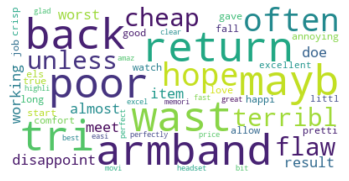

In [ ]:
#slelect most important 30 words for positive and negative
a=logistic_model.coef_[0]
b=cv.get_feature_names()
class1=sorted(zip(a,b))[:30]
class2=sorted(zip(a,b))[-30:]
#print(class1)
#print(class2)
list=[]
for o ,p in class1:
  list.append(p)
for o, p in class2:
  list.append(p)
print(list)
list=' '.join(list)
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(list)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()